In [1]:
import os


os.chdir('../../experiments')

# print("Current working directory:", os.getcwd())

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import random


# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
directory = "../data"
files = os.listdir(directory)
files

['CustomColoredFashionMNIST', 'FashionMNIST', 'MNIST']

In [4]:
grey_transform = transforms.Compose([
    # Convert grayscale to 3-channel RGB
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
                         )  # Normalize for 3 channels

])

In [5]:
train_batch_size = 64
test_batch_size = 128

In [6]:
grey_train_dataset = datasets.FashionMNIST(
    directory, train=True, download=True, transform=grey_transform)

grey_test_dataset = datasets.FashionMNIST(
    directory, train=False, transform=grey_transform)

grey_train_loader = DataLoader(
    grey_train_dataset, batch_size=train_batch_size, shuffle=True)
grey_test_loader = DataLoader(
    grey_test_dataset, batch_size=test_batch_size, shuffle=False)

In [7]:
sample_image, sample_label = grey_train_dataset[0]
print(f"Sample image shape: {sample_image.shape}, Label: {sample_label}")

Sample image shape: torch.Size([3, 28, 28]), Label: 9


In [8]:
class_colors = {
    0: (255, 0, 0),   # Red
    1: (0, 255, 0),   # Green
    2: (0, 0, 255),   # Blue
    3: (255, 255, 0),  # Yellow
    4: (0, 255, 255),  # Cyan
    5: (255, 0, 255),  # Magenta
    6: (128, 0, 0),   # Maroon
    7: (0, 128, 0),   # Dark Green
    8: (0, 0, 128),   # Navy
    9: (128, 128, 128)  # Gray
}

fashion_mnist_classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [ ]:

from torch.utils.data import Dataset


class ColoredFashionMNIST(Dataset):
    def __init__(self, dataset, class_colors, transform=None):
        """
        Custom dataset for FashionMNIST with class-based coloring.

        Args:
        - dataset: Torchvision dataset (e.g., FashionMNIST).
        - class_colors: List of RGB tuples for each class.
        - transform: Torchvision transforms to apply to the images.
        """
        self.dataset = dataset
        self.class_colors = class_colors
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Get the grayscale image and label
        image, label = self.dataset[idx]

        # Apply the transformation (if provided)
        if self.transform:
            image = self.transform(image)

        # Convert grayscale to colored
        colored_image = self.grayscale_to_colored(image, label)

        return colored_image, label

    def grayscale_to_colored(self, image, label):
        """
        Converts a transformed 3-channel normalized tensor to class-colored RGB tensor.

        Args:
        - image: Tensor of shape (3, H, W) with values normalized to (-1, 1).
        - label: Class label to determine color.

        Returns:
        - colored_image: Tensor of shape (3, H, W) with class-specific coloring.
        """
        # De-normalize to range [0, 1]
        image = (image * 0.5) + 0.5

        # Get the RGB color for the class
        color = torch.tensor(
            self.class_colors[label], dtype=torch.float32) / 255.0

        # Scale the image by the class color
        colored_image = image * color.view(3, 1, 1)

        return colored_image


# Example usage
grey_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Ensure 3 channels for input
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
                         )  # Normalize for 3 channels
])

# Define class colors (example: 10 classes with random RGB colors)
class_colors = [
    (255, 0, 0),  # Red for class 0
    (0, 255, 0),  # Green for class 1
    (0, 0, 255),  # Blue for class 2
    (255, 255, 0),  # Yellow for class 3
    (255, 0, 255),  # Magenta for class 4
    (0, 255, 255),  # Cyan for class 5
    (128, 128, 128),  # Gray for class 6
    (255, 128, 0),  # Orange for class 7
    (128, 0, 255),  # Purple for class 8
    (0, 128, 255),  # Sky blue for class 9
]

In [ ]:


train_fashion_mnist = datasets.FashionMNIST(
    root=directory,
    train=True,
    download=True,
    transform=None
)
test_fashion_mnist = datasets.FashionMNIST(
    root=directory,
    train=False,
    download=True,
    transform=None
)


train_colored_dataset = ColoredFashionMNIST(
    train_fashion_mnist, class_colors, transform=grey_transform)
test_colored_dataset = ColoredFashionMNIST(
    test_fashion_mnist, class_colors, transform=grey_transform)

sample_image, sample_label = train_colored_dataset[0]
print(f"Sample image shape: {sample_image.shape}, Label: {sample_label}")

Sample image shape: torch.Size([3, 28, 28]), Label: 9


In [ ]:

colored_train_loader = DataLoader(
    train_colored_dataset, batch_size=train_batch_size, shuffle=True)
colored_test_loader = DataLoader(
    test_colored_dataset, batch_size=test_batch_size, shuffle=False)

In [ ]:
# # Correct grayscale_to_colored function
# def grayscale_to_colored(image, label, class_colors):
#     """
#     Converts a grayscale image to a colored image based on class colors.
#     """
#     color = class_colors[label]
#     # Initialize RGB image
#     colored_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
#     for i in range(3):  # RGB channels
#         colored_image[:, :, i] = (image * color[i]).astype(np.uint8)
#     return colored_image, label
# # .to(torch.uint8)

# def grayscale_to_colored(image, label, class_colors):
#     """
#     Converts a grayscale image (PyTorch tensor) to a colored image based on class colors.
#     """
#     color = class_colors[label]  # Class-specific RGB color (list or tuple)
#     # Initialize an empty tensor for the RGB image
#     colored_image = torch.zeros((3, image.shape[0], image.shape[1]), dtype=torch.uint8)
#     for i in range(3):  # RGB channels
#         colored_image[i] = (image * color[i]).to(torch.uint8)
#     return colored_image, label

# def grayscale_to_colored(image, label, class_colors):
#     """
#     Converts a grayscale image (PyTorch tensor) to a colored image based on class colors.
#     """
#     color = class_colors[label]  # Class-specific RGB color (list or tuple)
#     # Initialize an empty tensor for the RGB image
#     colored_image = torch.zeros((3, image.shape[0], image.shape[1]), dtype=torch.uint8)

#     for i in range(3):  # Iterate over the RGB channels
#         colored_image[i] = (image * color[i]).to(torch.uint8)  # Apply color

#     return colored_image, label

In [13]:
# class ColoredFashionMNIST(torch.utils.data.Dataset):
#     def __init__(self, dataset, class_colors):
#         self.dataset = dataset
#         self.class_colors = class_colors

#     def __len__(self):
#         return len(self.dataset)

#     def __getitem__(self, idx):
#         image, label = self.dataset[idx]
#         colored_image, label = grayscale_to_colored(
#             image, label, self.class_colors)
#         # Normalize to [0, 1]
#         return torch.from_numpy(colored_image).permute(2, 0, 1).float() / 255, label

In [14]:
# transform = transforms.Compose([transforms.ToTensor()])
# train_dataset = datasets.FashionMNIST(
#     root=directory, train=True, transform=transform, download=True)
# test_dataset = datasets.FashionMNIST(
#     root=directory, train=False, transform=transform, download=True)


# colored_train_dataset = ColoredFashionMNIST(train_dataset, class_colors)
# colored_train_loader = DataLoader(
#     colored_train_dataset, batch_size=train_batch_size, shuffle=True)

# colored_test_dataset = ColoredFashionMNIST(test_dataset, class_colors)
# colored_train_loader = ColoredFashionMNIST(colored_test_dataset, class_colors)

In [15]:
fashion_mnist_classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


def show_images_from_loader(loader, classes=fashion_mnist_classes, n_images=64):

    # Get a batch of images and labels
    images, labels = next(iter(loader))

    # Select n_images from the batch
    # print(labels)
    images, labels = images[:n_images], labels[:n_images]

    # Create a grid of images
    grid = utils.make_grid(images, nrow=int(
        n_images**0.5), padding=2, normalize=True)

    plt.figure(figsize=(8, 8))
    # Convert from (C, H, W) to (H, W, C) for plotting
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.title("Sample Images from Dataset")

    for i, label in enumerate(labels):
        row, col = divmod(i, int(n_images**0.5))
        plt.text(col * (grid.size(2) / n_images**0.5) + 5,
                 row * (grid.size(1) / n_images**0.5) + 5,
                 classes[label.item()],
                 color='white', fontsize=9, ha='center', bbox=dict(facecolor='black', alpha=0.6))
    plt.show()

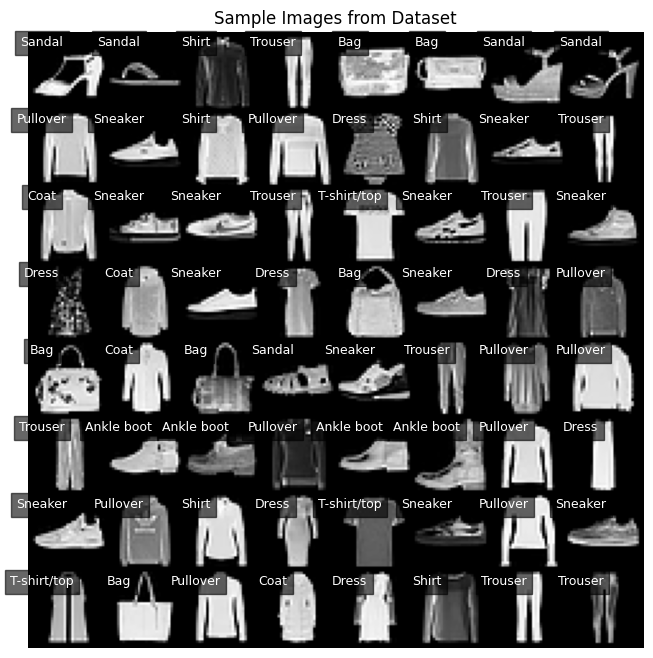

In [16]:
show_images_from_loader(grey_train_loader)

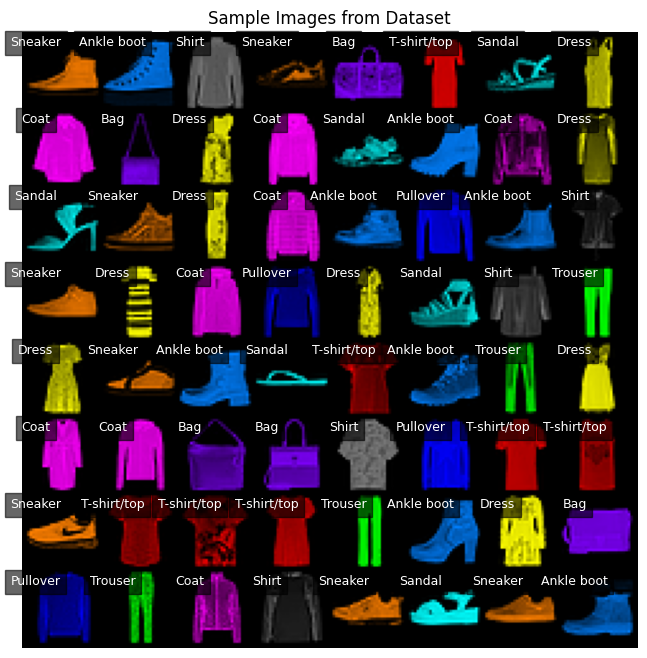

In [17]:
show_images_from_loader(colored_train_loader)

Train

In [18]:
from train import train, test
from cnn import _2LayerCNN

In [19]:
model = _2LayerCNN().to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [20]:
for epoch in range(1, 5):
    train(model, device, colored_train_loader, optimizer, epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306191
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.001485
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.000227
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.000261
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.000045
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.000067
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.000378
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.003483
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.000041
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.000011
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.000646
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.000017
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.000005
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.000293
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.000034
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.000014
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.000014
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.000031
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.054872
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.000278
Train Epoch:

In [21]:
test(model, device, colored_test_loader)


Test set: Average loss: 0.0000, Accuracy: 10000/10000 (100.00%)



In [22]:
test(model, device, grey_test_loader)


Test set: Average loss: 0.2139, Accuracy: 1196/10000 (11.96%)



perform ood detection

In [23]:
from ood_detection import OODDetection

In [24]:
ood_detector = OODDetection(model, device)

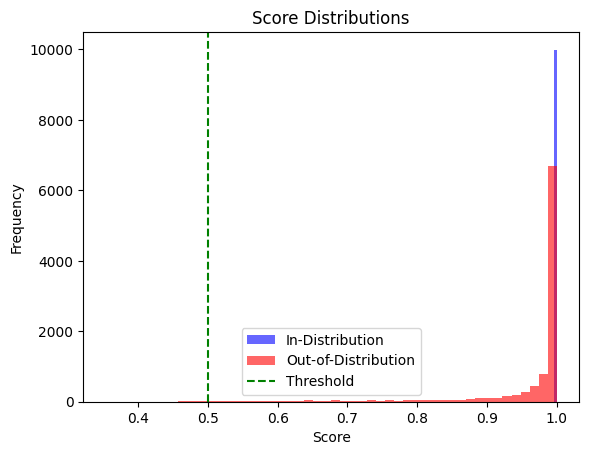

Threshold OOD Detection: Softmax Threshold = 0.50 with scoring function: <function OODDetection.max_confidence at 0x000002431B8076A0>
In-Distribution Detection Rate: 1.00
Out-of-Distribution Detection Rate: 0.00
OOD samples classified as ID: 99.58%
OOD samples classified as OD: 0.42%


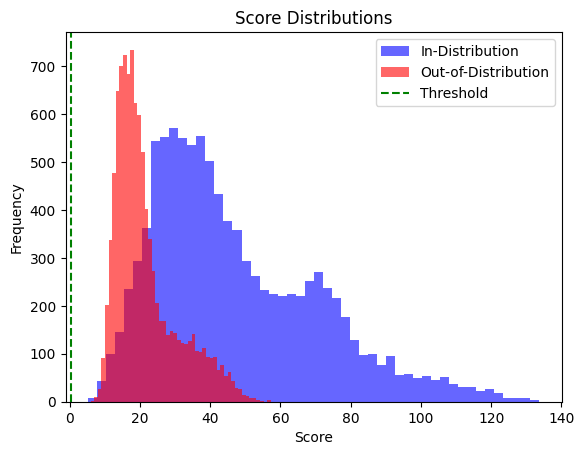

Threshold OOD Detection: Softmax Threshold = 0.50 with scoring function: <function OODDetection.energy_score at 0x000002431B8074C0>
In-Distribution Detection Rate: 1.00
Out-of-Distribution Detection Rate: 0.00
OOD samples classified as ID: 100.00%
OOD samples classified as OD: 0.00%


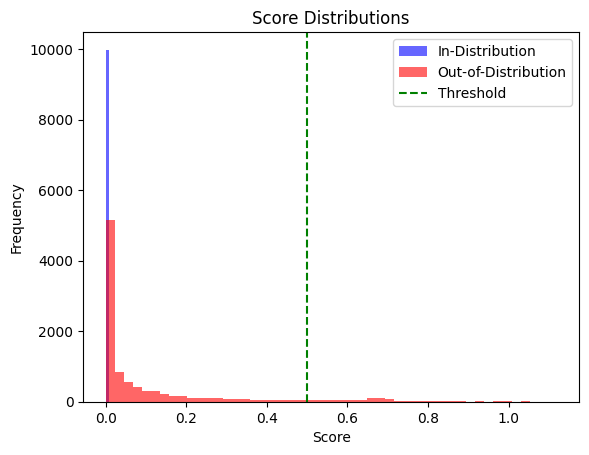

Threshold OOD Detection: Softmax Threshold = 0.50 with scoring function: <function OODDetection.entropy_score at 0x000002431B807740>
In-Distribution Detection Rate: 0.00
Out-of-Distribution Detection Rate: 1.00
OOD samples classified as ID: 8.25%
OOD samples classified as OD: 91.75%
Logistic Regression OOD Detection: Decision Threshold = 0.50
In-Distribution Detection Rate: 0.96
Out-of-Distribution Detection Rate: 0.99
OOD samples classified as ID: 0.56%
OOD samples classified as OD: 99.44%


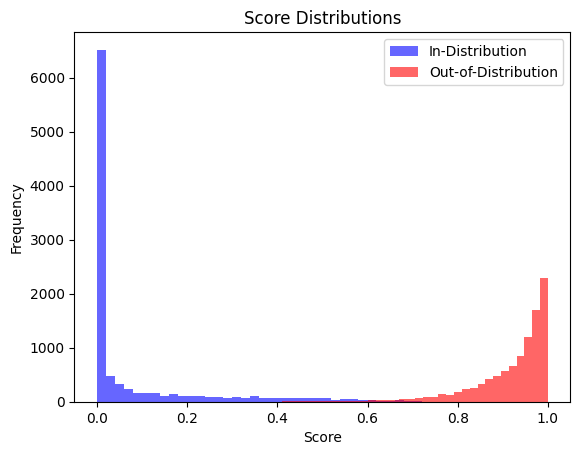

In [25]:
results = ood_detector.run_all_methods(colored_test_loader, grey_test_loader)

In [26]:
results

{'threshold': {'in_detection_rate': 0.0,
  'ood_detection_rate': 1.0,
  'ood_as_id_percent': 8.25,
  'ood_as_od_percent': 91.75},
 'logistic_regression': {'in_detection_rate': 0.9613,
  'ood_detection_rate': 0.9944,
  'ood_as_id_percent': 0.56,
  'ood_as_od_percent': 99.44,
  'accuracy': 0.97785,
  'logistic_regression_model': LogisticRegression(random_state=42)}}